In [1]:
## parameter cell

In [2]:
from lsst.daf.butler import Butler
import datetime

In [3]:
butler = Butler('embargo_new', collections=['LSSTCam/raw/all', 'LSSTCam/calib/unbounded'])

dayObs = 20241030
instrument = "LSSTCam"

exposureList = []
for record in butler.registry.queryDimensionRecords("exposure", 
                    where=f"exposure.day_obs>={dayObs} and instrument='LSSTCam'"):
    exposureList.append([record.id, record])
print(f"Image count in butler since {dayObs} by {datetime.datetime.now()} is {len(exposureList)}")


Image count in butler since 20241030 by 2025-01-28 15:55:43.871878 is 18101


In [6]:
collections = ["LSSTComCam/hips/DRP/DP1/w_2025_04/DM-48556/"]
butler=Butler('embargo',collections=collections)

In [13]:
butler.registry.queryCollections('*DP1*')

['LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250114T150254Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/hips/deep/20250114T193412Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/hips/deep/20250114T193519Z',
 'LSSTComCam/raw/DP1-RC1/DM-48240',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250111T215953Z',
 'LSSTComCam/raw/DP1/DM-48240',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/hips/deep/20250114T193312Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250111T001350Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250114T063012Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250114T210750Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250111T004015Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/hips/deep/20250114T193626Z',
 'u/dtaranu/DM-47234/DP1-RC1/w_2025_02/match/20250116T005643Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250110T203415Z',
 'LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371/20250114T133941Z',
 'u/dtaranu/

In [41]:
collections=['LSSTComCam/runs/nightlyValidation/20241210/w_2024_48/DM-47059']
deepcoaddrefs=butler.registry.queryDatasets('deepCoadd', collections=collections)
deepcoadd=butler.get('deepCoadd',collections=collections, dataId=list(deepcoaddrefs)[0].dataId)

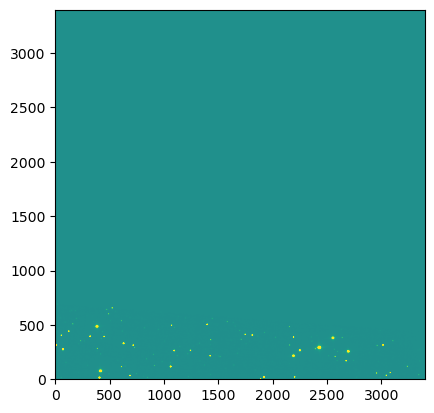

In [49]:
import pylab
pylab.imshow(deepcoadd.maskedImage.image.array,vmin=-100,vmax=100,origin='lower')

In [47]:
deepcoadd.maskedImage.image

lsst.afw.image._image.ImageF=[[-5.8273917e-01  8.5958523e-01  1.1051829e-01 ...  7.2656855e-02
   7.2656855e-02  7.2656855e-02]
 [-3.5635795e-04  3.1022131e-01 -9.6373492e-01 ...  7.2656855e-02
   7.2656855e-02  7.2656855e-02]
 [-2.7829260e-01 -6.0613388e-01 -1.0321044e+00 ...  7.2656855e-02
   7.2656855e-02  7.2656855e-02]
 ...
 [ 7.2656855e-02  7.2656855e-02  7.2656855e-02 ...  7.2656855e-02
   7.2656855e-02  7.2656855e-02]
 [ 7.2656855e-02  7.2656855e-02  7.2656855e-02 ...  7.2656855e-02
   7.2656855e-02  7.2656855e-02]
 [ 7.2656855e-02  7.2656855e-02  7.2656855e-02 ...  7.2656855e-02
   7.2656855e-02  7.2656855e-02]], bbox=(minimum=(26800, 11800), maximum=(30199, 15199))